### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('advertising_sales_data.csv')
df.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


### Checking for null values

In [5]:
df.isna().sum()

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


### Removing the rows with missing values

In [6]:
df = df.dropna()
df.isna().sum()

,0
Campaign,0
TV,0
Radio,0
Newspaper,0
Sales,0


### Visualizing the data

Text(0.5, 1.0, 'Newspaper Sales')

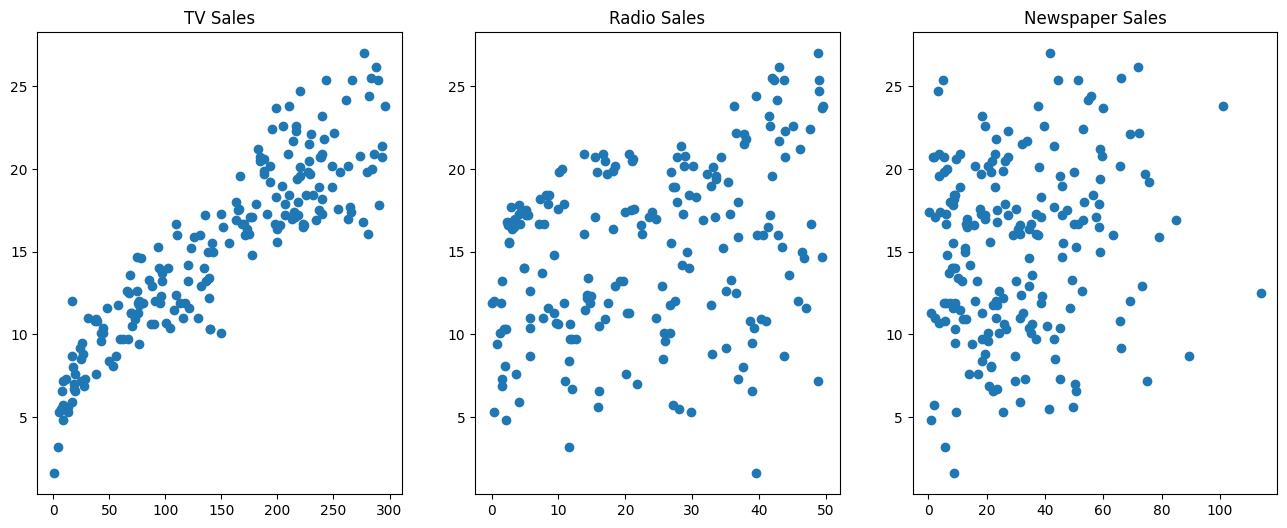

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].set_title('TV Sales')

axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].set_title('Radio Sales')

axes[2].plot(df['Newspaper'], df['Sales'],'o')
axes[2].set_title('Newspaper Sales')



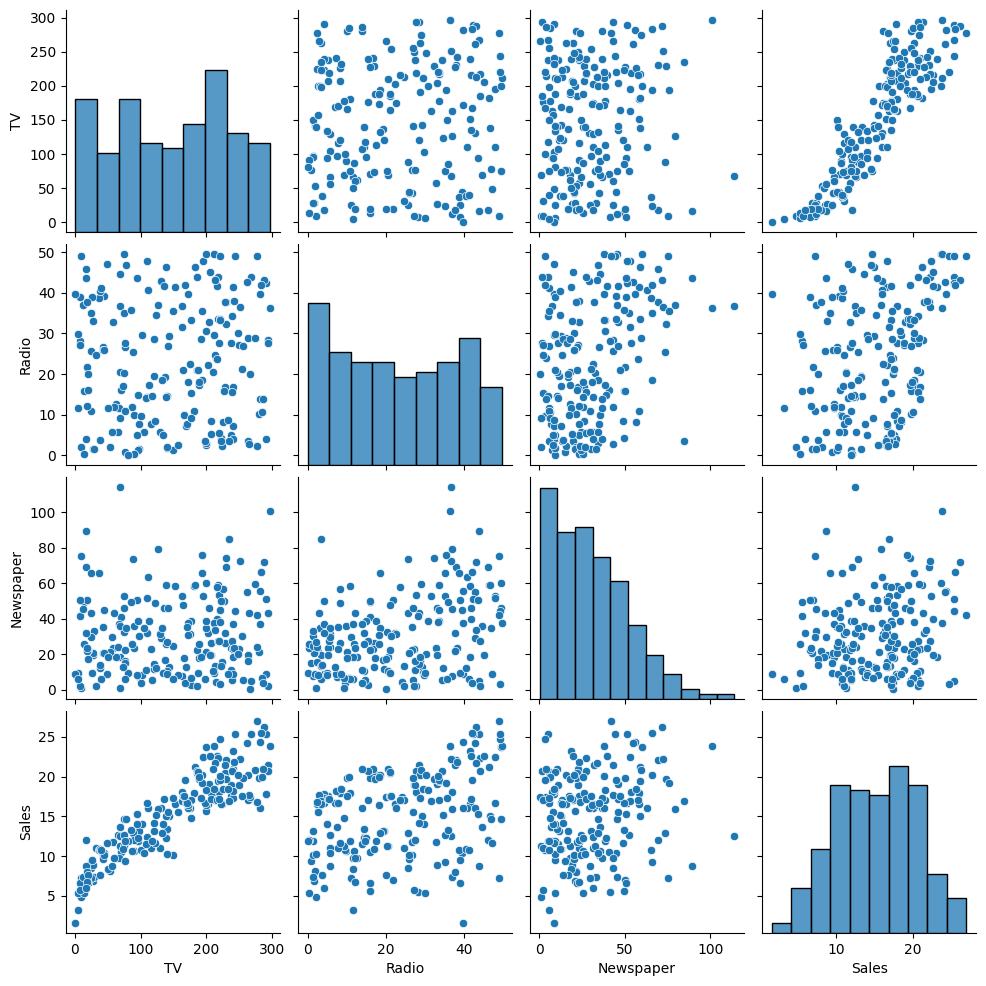

In [8]:
sns.pairplot(df)

### Dropping the Campaign column


In [9]:
df.drop('Campaign', axis=1, inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Average amount spent on TV advertising

In [10]:
average = df['TV'].mean()
print(f'The average amount spent on TV advertising is: {average:.2f}')

The average amount spent on TV advertising is: 146.79


### Correlation between Radio and Sales

In [11]:
correlation = df['Radio'].corr(df['Sales'])
print(f'The correlation between Radio Advertising Expenditure and Product Sales is: {correlation:.2f}')

The correlation between Radio Advertising Expenditure and Product Sales is: 0.35


### Correlation Matrix

In [12]:
correlation_matrix = df.corr()
print(correlation_matrix)
print('TV has the highest impact on sales based on the dataset')

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054848   0.059075  0.901372
Radio      0.054848  1.000000   0.354987  0.349728
Newspaper  0.059075  0.354987   1.000000  0.159125
Sales      0.901372  0.349728   0.159125  1.000000
TV has the highest impact on sales based on the dataset


### Splitting the dataset into training and testing sets

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### Training the model

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Making predictions

In [15]:
y_pred = model.predict(X_test)

### Visualize the results

In [16]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Sort the DataFrame by actual values for better visualization
results_df = results_df.sort_values(by='Actual').reset_index(drop=True)


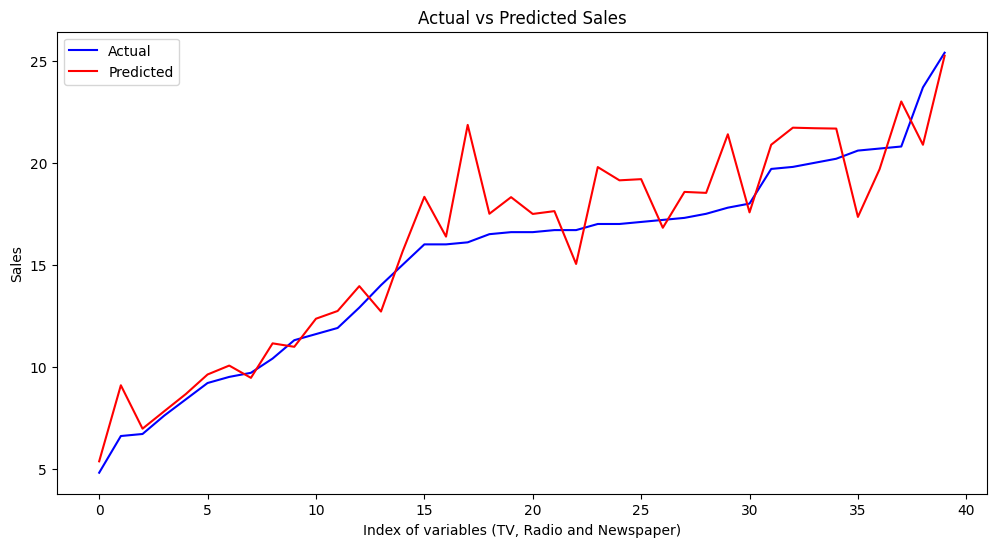

In [17]:
# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual', color='blue')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', color='red')

plt.xlabel('Index of variables (TV, Radio and Newspaper)')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


### Prediction on a new user-defined value

In [18]:
new_pred = model.predict([[200,40,50]]) #200 on TV, 40 on Radio and 50 on Newspaper
print(f'The predicted sale for the new advertising expenditure is: {new_pred[0]:.2f}')

The predicted sale for the new advertising expenditure is: 19.99


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Evaluate the performance of the model

In [19]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(f'The RMSE value is: {RMSE}')

The RMSE value is: 1.7808120931798435


# Performance of the linear regression model when the dataset is normalized

### Normalizing the data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
normalized_model = LinearRegression()
normalized_model.fit(X_train_scaled, y_train)
y_pred_scaled = normalized_model.predict(X_test_scaled)

In [22]:
MSE_scaled = mean_squared_error(y_test, y_pred_scaled)
RMSE_scaled = np.sqrt(MSE_scaled)
print(f'The RMSE value after normalizing the data is: {RMSE_scaled}')

The RMSE value after normalizing the data is: 1.7808120931798426


### Impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors

In [23]:
X = df[['Radio','Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [24]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(f'The RMSE value when only Radio and Newspaper are considered is: {RMSE}')

The RMSE value when only Radio and Newspaper are considered is: 4.848813578476358
